# The Sparks Foundation GRIP - JAN 2022
# Role - Data Science and Business Analytics Intern
# Author - Archita K
# Intermediate Level Task 6 - Prediction using Decision Tree Algorithm

# Importing the Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import pydotplus

# Loading the Dataset

In [2]:
iris_data = pd.read_csv('iris.csv')

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_data.shape

(150, 6)

In [6]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
iris_data.max()

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [9]:
iris_data.min()

Id                         1
SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [10]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
iris_data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [12]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
iris_data = iris_data.drop(columns=['Id'])
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing the Dataset

In [14]:
iris_data.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [15]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
iris_data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Visualization

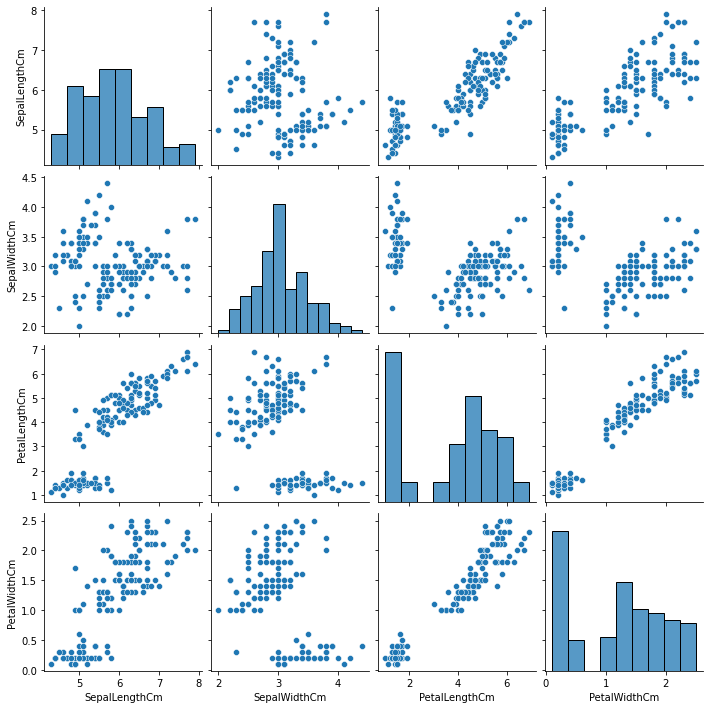

In [17]:
sns.pairplot(iris_data)

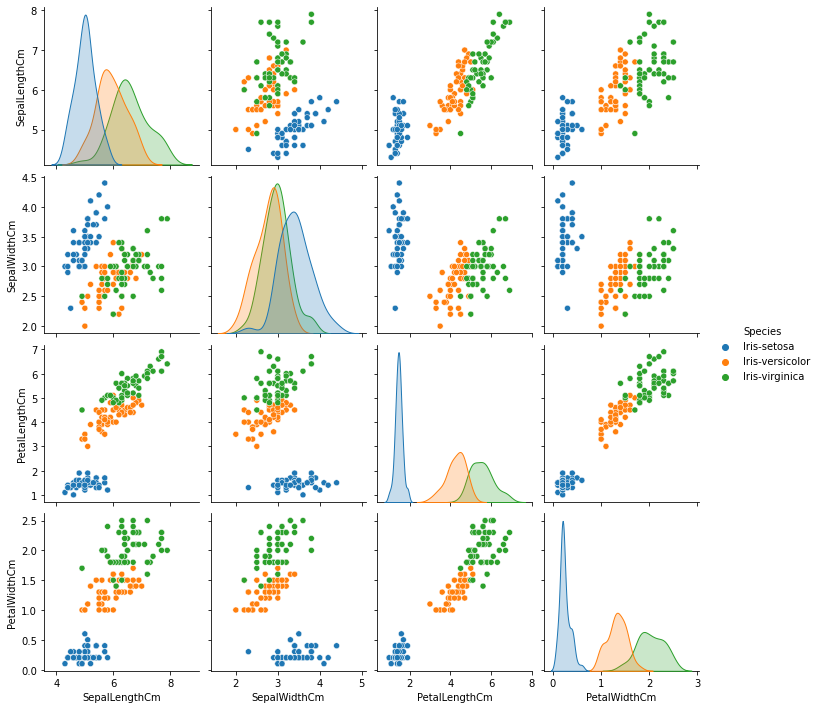

In [18]:
sns.pairplot(iris_data,hue='Species')

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

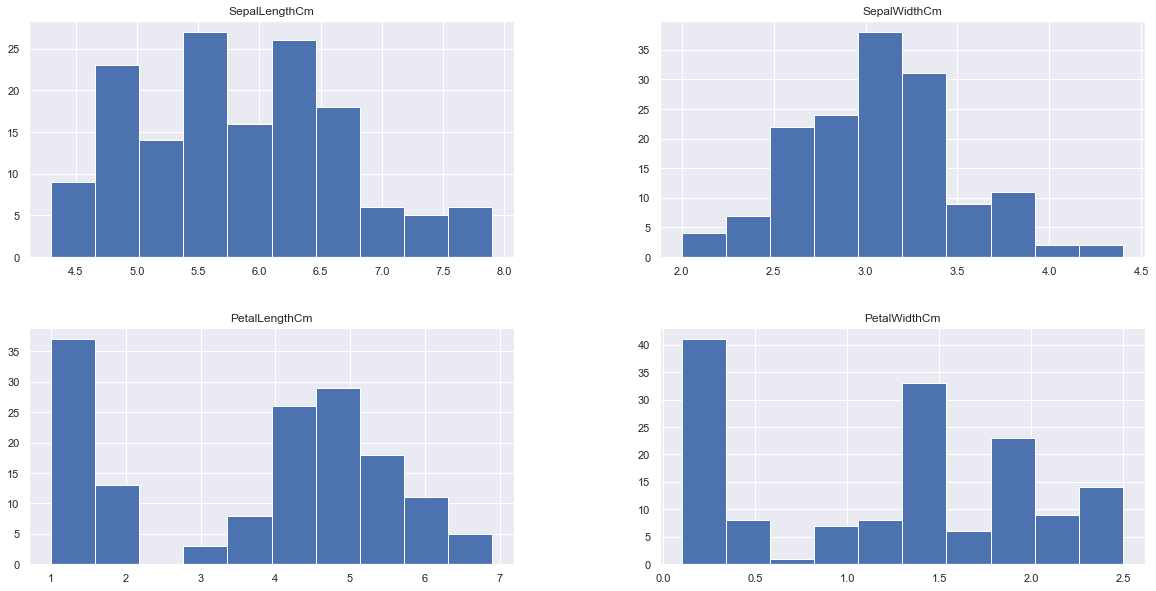

In [19]:
sns.set(rc={'figure.figsize':(20,10)})
iris_data.hist()

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

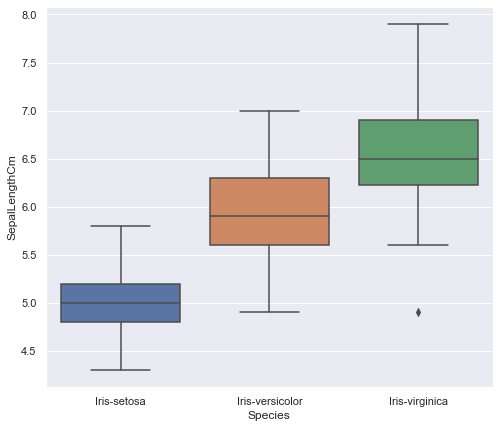

In [20]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='SepalLengthCm',data=iris_data)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

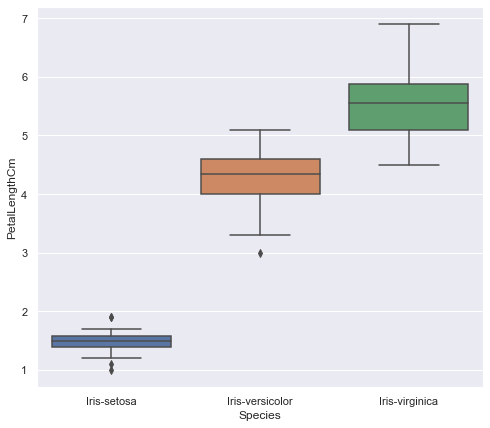

In [21]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='PetalLengthCm',data=iris_data)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

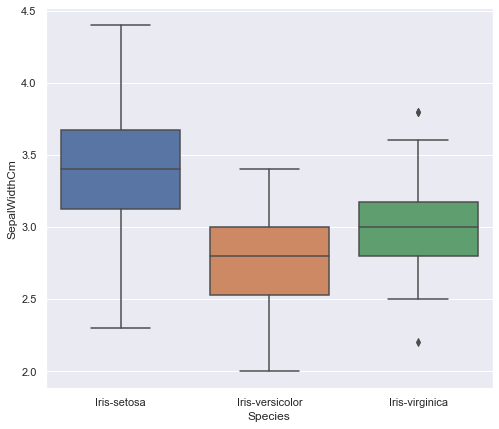

In [22]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='SepalWidthCm',data=iris_data)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

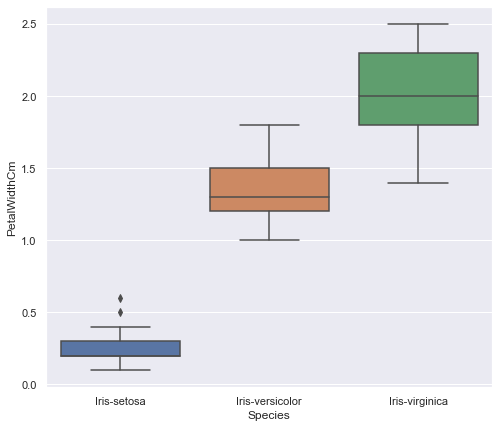

In [23]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='PetalWidthCm',data=iris_data)

In [24]:
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

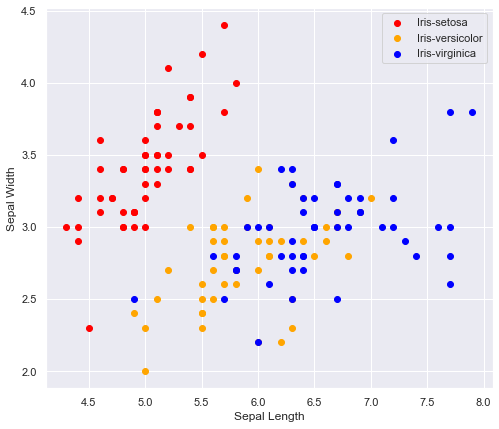

In [25]:
for i in range(3):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x=x['SepalLengthCm'], y=x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

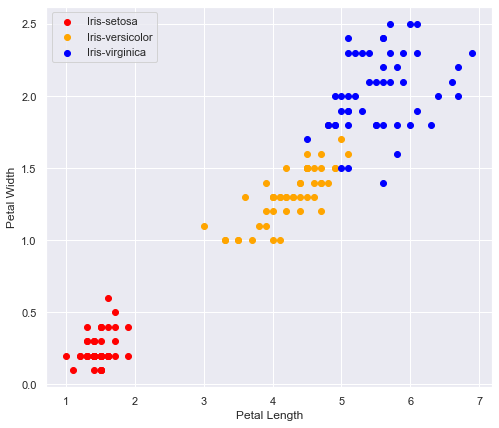

In [26]:
for i in range(3):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x=x['PetalLengthCm'], y=x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

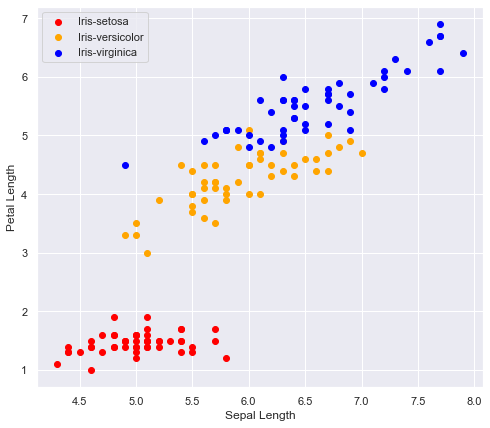

In [27]:
for i in range(3):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x=x['SepalLengthCm'], y=x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

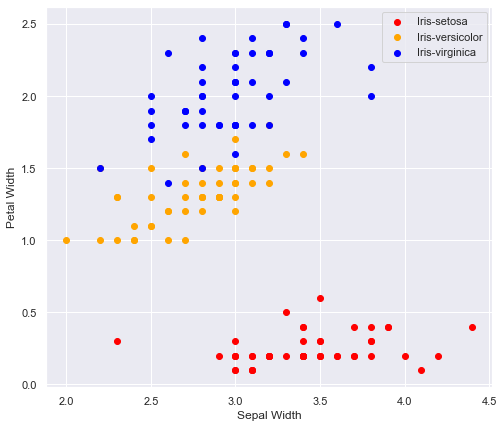

In [28]:
for i in range(3):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x=x['SepalWidthCm'], y=x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

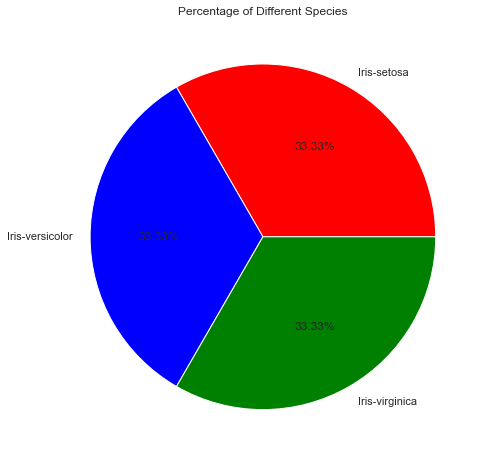

In [29]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_axes([0,0,1,1])
colors = ['red','blue','green']
sp = iris_data['Species'].unique()
vc = iris_data['Species'].value_counts()
ax.pie(vc, labels=sp, autopct='%1.2f%%', colors=colors)
plt.title('Percentage of Different Species')
plt.show()

# Correlation Matrix

In [30]:
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

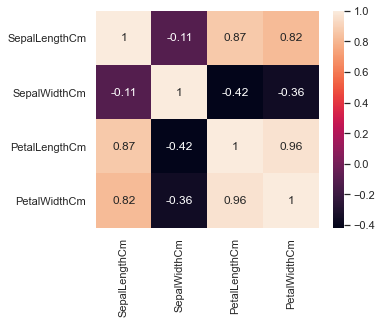

In [31]:
corr = iris_data.corr()
plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True)

# Prediction using Decision Tree Algorithm

In [32]:
dc = DecisionTreeClassifier()

In [33]:
X = iris_data.drop(['Species'], axis=1)
y = iris_data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [34]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
print(dc.score(X_test, y_test)*100)

95.55555555555556


In [38]:
y_pred = dc.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is:",accuracy)

Accuracy is: 0.9555555555555556


In [40]:
cr = classification_report(y_test, y_pred)
print('Classification Report:',cr)

Classification Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [44]:
features = iris_data.columns[:4]
classes = iris_data['Species'].unique().tolist()

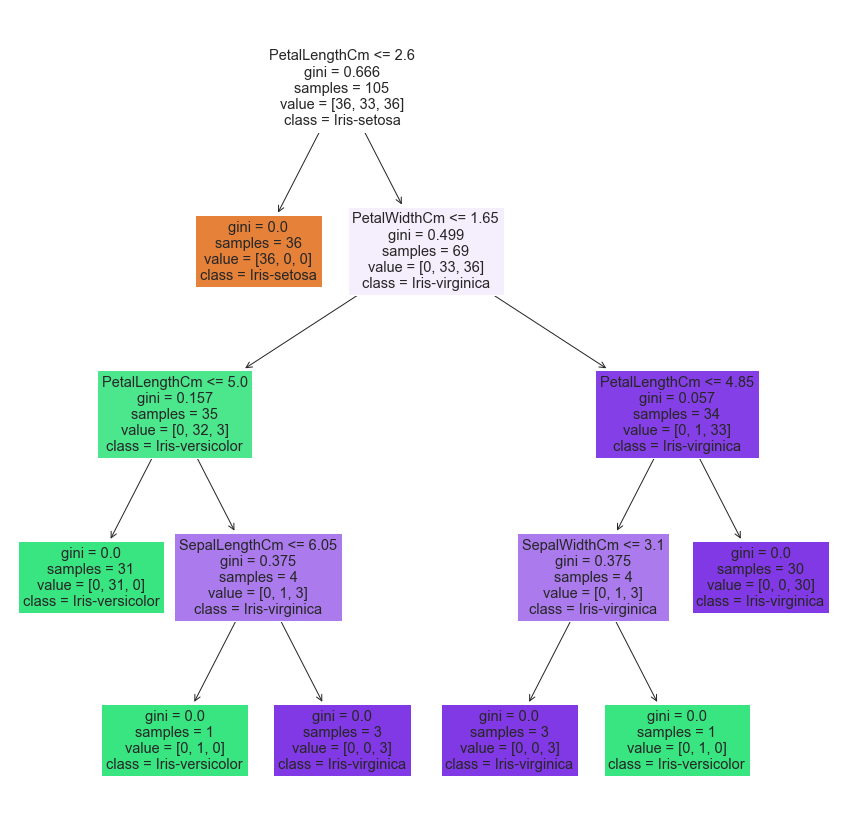

In [49]:
plt.figure(figsize=(15,15))
plot_tree(dc, feature_names = features, class_names = classes, filled = True)
plt.show()